**Observed:**

In `odc-stac` version 0.3.5, `odc.stac.load` results in missing data at the boundary of adjacent MODIS Sinusoidal projection tiles when reprojecting.

In [1]:
import odc.stac
import pystac
from odc.geo.geobox import AnchorEnum
import matplotlib.pyplot as plt

In [2]:
item1 = pystac.read_file(
    "data/MCD43A4.A2023205.h08v04.061.2023216154635/MCD43A4.A2023205.h08v04.061.2023216154635.json"
)
item2 = pystac.read_file(
    "data/MCD43A4.A2023205.h08v05.061.2023216154702/MCD43A4.A2023205.h08v05.061.2023216154702.json"
)

When you load the Items separately and plot the data on the same graph, there is no gap in the data.

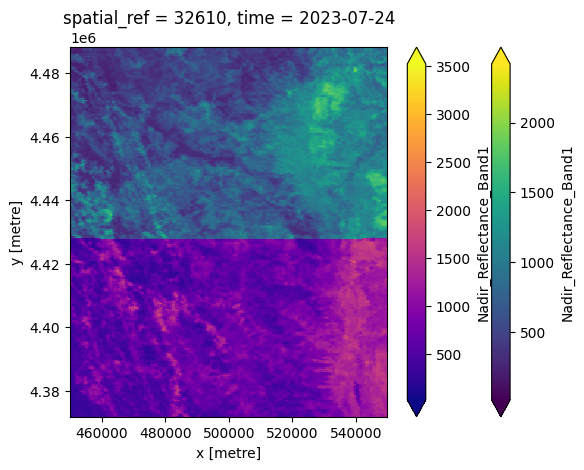

In [3]:
fig, ax = plt.subplots(1)
ax.axis("equal")

ds1 = odc.stac.load(
    [item1],
    crs="EPSG:32610",
    anchor=AnchorEnum.CENTER,
)
ds1.isel(time=0).Nadir_Reflectance_Band1.plot(
    ax=ax, xlim=[450000, 550000], ylim=[4380000, 4480000], cmap="viridis", robust=True
)

ds2 = odc.stac.load(
    [item2],
    crs="EPSG:32610",
    anchor=AnchorEnum.CENTER,
)
ds2.isel(time=0).Nadir_Reflectance_Band1.plot(
    ax=ax, xlim=[450000, 550000], ylim=[4380000, 4480000], cmap="plasma", robust=True
)

But when you load both Items at once, there is a missing sliver of data at the tile boundary.

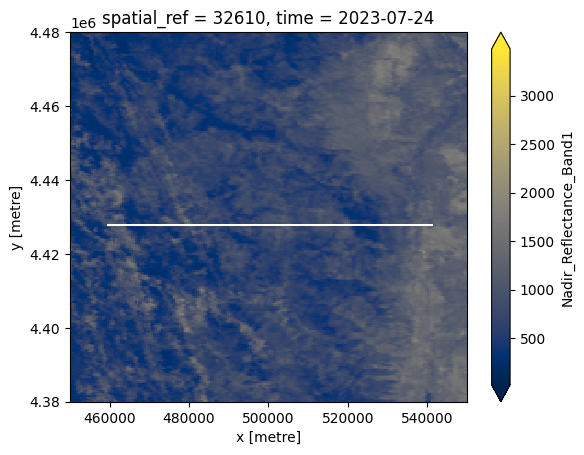

In [4]:
ds = odc.stac.load(
    [item1, item2],
    crs="EPSG:32610",
    anchor=AnchorEnum.CENTER,
)

ds.isel(time=0).Nadir_Reflectance_Band1.plot(
    xlim=[450000, 550000],
    ylim=[4380000, 4480000],
    robust=True,
    cmap="cividis",
)